In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200

%matplotlib inline

In [2]:
data = pd.read_csv("vaccination_tweets.csv")

In [3]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
corpus = np.array(data['text'])

In [5]:
corpus_df = pd.DataFrame({'Document': corpus})
corpus_df = corpus_df[['Document']]
corpus_df

,Document
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
...,...
7010,Around 2 per cent of people who received the first dose of #PfizerBioNTech and #Moderna's mRNA-based… https://t.co/iR2ZoS9E3h
7011,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/lgTJ5QIglp"
7012,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/LtRsojlFXN"
7013,"After watching this,\n\nI prefer #PfizerBiontech &amp; #modernavaccine \n\nto #AstraZeneca &amp; #JohnsonAndJohnsonVaccine \n\nBu… https://t.co/wa3vOu56RC"


In [6]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # remove special characters: 
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', doc, )
    doc = re.sub(r'http[s]?(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', doc, )
    # transform to lower case
    doc = doc.lower()
    # remove \whitespaces
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

# crea una función vectorizada para que actué sobre múltiples textos
normalize_corpus = np.vectorize(normalize_document)
#normalize_corpus

In [7]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['folks said daikon paste could treat cytokine storm pfizerbiontech',
       'world wrong side history year hopefully biggest vaccination effort weve ev',
       'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last years',
       ...,
       'pfizerbiontech vaccine efficiently neutralized version virus engineered carry mutations',
       'watching prefer pfizerbiontech amp modernavaccine astrazeneca amp johnsonandjohnsonvaccine bu',
       'nstnation sabah deputy chief minister datuk seri bung moktar radin received covid pfizerbiontech vaccine'],
      dtype='<U124')

In [8]:
from gensim.models import word2vec

In [10]:
#help(word2vec)

In [25]:
# build word2vec model
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 300    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, iter=100)


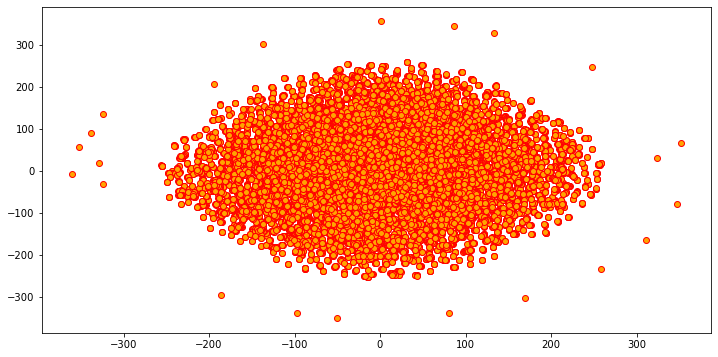

In [26]:
# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
#for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    #plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [21]:
w2v_model.wv['hope']

array([-0.5755047 , -2.0720391 ,  0.5467689 , -0.45163462, -1.5052555 ,
        2.5070243 ,  0.07485355, -1.0206989 ,  1.3597176 , -1.9498806 ,
        1.6951113 , -0.71582574,  0.846465  ,  1.3953866 ,  0.71074635,
       -1.1035707 ,  0.77759075, -0.39370623, -2.347963  ,  0.66801333,
       -3.8219051 ,  1.5788695 ,  2.3203294 ,  0.18204893,  0.07201803,
        2.2979214 ,  4.439564  , -0.51105106, -0.09677986, -1.0597559 ,
       -3.3332639 , -1.2045038 , -1.2904453 , -1.9601798 , -2.8641036 ,
        0.26294726,  0.315875  , -0.68650436, -5.206484  ,  1.068138  ,
        3.591485  ,  0.54627943,  0.41282445, -3.197647  , -0.7501329 ,
        0.71117455, -2.1130514 , -0.8298284 ,  1.830606  , -1.1187155 ],
      dtype=float32)

In [22]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
       
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model, num_features=feature_size)

<ipython-input-22-ffac17a5a2f6>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vector = np.add(feature_vector, model[word])


In [23]:
pp = pd.DataFrame(w2v_feature_array)
pp

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.315875,0.141151,-0.091824,0.021640,0.222707,0.609700,0.124363,-0.099523,0.387213,0.563190,...,0.237624,0.229091,0.351711,0.577794,-0.091359,0.419465,-0.891285,-0.069790,0.701594,-0.409955
1,-0.148692,-0.116282,0.455049,0.760972,-0.928825,0.179334,0.212476,1.007826,-0.593619,-0.662764,...,0.546313,1.002590,0.617320,0.152303,-0.282582,-0.917068,0.721124,0.867101,-0.473161,-0.847333
2,-1.410213,0.453265,-0.030398,-0.019301,0.131314,0.665814,1.413542,-0.311531,0.512172,-0.363739,...,1.258404,1.163156,1.662213,0.296147,0.542287,-1.187213,-0.523315,0.145494,-0.291718,0.409141
3,0.763000,0.792458,0.805868,-0.020730,0.324301,0.038944,-0.772251,-0.453547,0.732277,0.287771,...,0.045186,0.345494,-0.379680,0.461164,-0.263157,-0.345547,-0.441371,0.711008,0.468950,-0.563108
4,-0.551403,0.966039,-0.138568,0.498845,-0.203206,-0.232373,-1.891287,0.991881,1.254400,1.208612,...,0.345496,0.648610,0.714676,0.133872,0.051512,0.209039,-0.657705,1.132301,0.471513,-0.887482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,-1.555810,-0.653995,1.023084,-1.002344,0.202108,0.000999,0.217757,0.834329,-0.749899,1.002292,...,1.783923,0.144703,2.019461,0.394267,1.220345,0.168271,0.147383,0.961508,-0.198421,0.114637
7011,-0.126639,0.837568,0.366125,0.395568,-0.052743,0.395950,-0.018495,-0.144784,0.122160,0.157923,...,1.054913,0.609230,0.574268,0.207151,-0.059771,-0.284766,-0.143112,0.705102,0.124276,-0.488938
7012,-0.126639,0.837568,0.366125,0.395568,-0.052743,0.395950,-0.018495,-0.144784,0.122160,0.157923,...,1.054913,0.609230,0.574268,0.207151,-0.059771,-0.284766,-0.143112,0.705102,0.124276,-0.488938
7013,-1.462697,0.602527,-0.494796,-1.368746,1.461339,0.485721,0.078394,0.496432,1.728176,0.556894,...,0.106510,-0.256969,2.456986,-0.439338,1.597194,-1.763122,-0.239779,0.038700,-0.194883,-0.939593


In [24]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

C:\Users\sanch\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
C:\Users\sanch\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


,Document,ClusterLabel
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,-1
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",-1
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,-1
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",-1
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,-1
...,...,...
7010,Around 2 per cent of people who received the first dose of #PfizerBioNTech and #Moderna's mRNA-based… https://t.co/iR2ZoS9E3h,-1
7011,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/lgTJ5QIglp",-1
7012,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/LtRsojlFXN",-1
7013,"After watching this,\n\nI prefer #PfizerBiontech &amp; #modernavaccine \n\nto #AstraZeneca &amp; #JohnsonAndJohnsonVaccine \n\nBu… https://t.co/wa3vOu56RC",-1


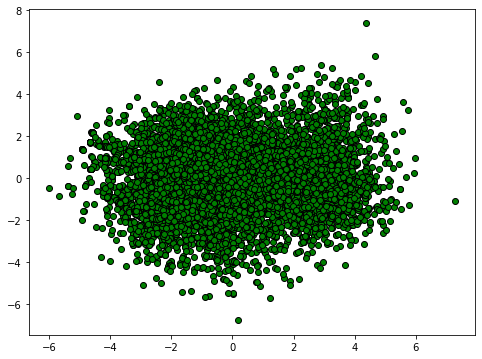

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
#categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    #annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    #plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')

In [17]:
# build word2vec model
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, sg=1, iter=100)


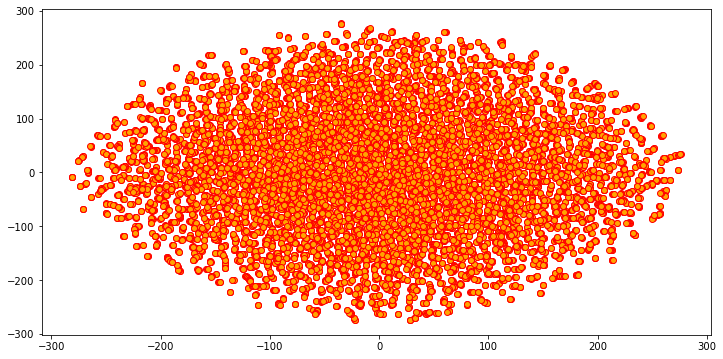

In [18]:
# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
#for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    #plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')